## Dataset description

En primer lugar, nos centraremos en el análisis del conjunto de datos en bruto, estudiando los diferentes tamaños de los conjuntos de datos, la distribución de las etiquetas, el tamaño, etc., sin realizar ningún tipo de preprocesamiento, salvo lo siguiente (que ya se ha resuelto). 

Algunos de los conjuntos de datos dados tenían valores corruptos en los atributos numéricos. El problema era que las características numéricas tenían valores de cadena sin sentido en algunas filas. Esto se resolvió mediante la creación de un script python personalizado que elimina esas filas no válidas, que puede encontrarse en el directorio */Scripts*. Este script no se incluyó en este *Notebook* debido a la carga computacional necesaria para realizar la operación, por lo que esos scripts se ejecutaron en segundo plano en paralelo:

```console
$ nohup python3 clean_dataset1.py > dataset1.out &
$ nohup python3 clean_dataset2.py > dataset2.out &
$ nohup python3 clean_dataset3.py > dataset3.out &
$ nohup python3 clean_dataset4.py > dataset4.out &
```

### Librerías necesarias

In [1]:
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 80)

### Carga del conjunto de datos

In [2]:
df_from_each_file = []
# This will help pandas identify N/a values
na_val = ['N/a', 'na', 'Na', 'NA', 'NAN', 'Nan', 'NaN', np.nan]

for file in glob(getcwd() + "/../Processed Traffic Data for ML Algorithms/*.csv"):
    print(f'Appending {file}')
    read_df = pd.read_csv(file, sep=',', low_memory=False, na_values=na_val)
    if 'Unnamed: 0' in list(read_df.columns):
        read_df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df_from_each_file.append(read_df)

df = pd.concat(df_from_each_file, ignore_index=True)
del(read_df, df_from_each_file)

Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/New-Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/New-Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
Appending /home/jovyan/My-Notebooks/../Processed Traffic Data for ML Algorithms/New-Th

In [3]:
df.info()
print(f'Size of dataset: {df.shape}.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max     

In [4]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.026633,5.630000e+07,1.385929e+02,56300000.0,56300000.0,113000000.0,5.630000e+07,1.385929e+02,56300000.0,56300000.0,0.0,0.0000,0.000,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56300000.0,138.592929,56300000.0,56300000.0,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.026633,5.630000e+07,2.637508e+02,56300000.0,56300000.0,113000000.0,5.630000e+07,2.637508e+02,56300000.0,56300000.0,0.0,0.0000,0.000,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56300000.0,263.750829,56300000.0,56300000.0,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416.0,1344.0,240.0,64.0,105.043478,54.542292,64.0,0.0,30.545455,32.336497,180.907146,3.223611,3.149113e+05,1.145954e+06,9058214.0,66.0,20700000.0,9.404843e+05,1.898330e+06,9144734.0,66.0,20700000.0,482352.2093,1396411.114,9058214.0,41601.0,1,0,0,0,460,880,1.106613,2.116999,0.0,240.0,56.235294,53.851681,2900.003512,0,1,0,0,1,0,0,0,1.0,57.074627,105.043478,30.545455,0,0,0,0,0,0,23,2416,44,1344,263,255,22,20,2624734.0,0.0,2624734.0,2624734.0,9058214.0,0.000000,9058214.0,9058214.0,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.026633,5.630000e+07,8.202439e+01,56300000.0,56300000.0,113000000.0,5.630000e+07,8.202439e+01,56300000.0,56300000.0,0.0,0.0000,0.000,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56300000.0,82.024387,56300000.0,56300000.0,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,100000.000000,2.000000e+01,0.000000e+00,20.0,20.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0,0,0,0,20,20,50000.000000,50000.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,58856,0,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


## Distribución del tráfico

El conjunto de datos muestra una gran diferencia entre el tráfico normal y el de ataque. Para ser más precisos, el tráfico normal constituye el 83% del conjunto de datos. De alguna manera tendremos que tratar esta característica, aplicando técnicas de equilibrio de clases más adelante, en otro Cuaderno.

Además, en el tráfico de ataque se observan siete escenarios de ataque diferentes, que incluyen: Fuerza bruta, Botnet, DoS, DDoS, ataques web e infiltración en la red desde el interior. Los ataques realizados se muestran a continuación:

| Attack | Tools                                 | Duration |
| --- | :---: | --- |
| Brute-force | FTP -patator, SSH – Patator | One day |
| DoS attack | Hulk, GoldenEye, Slowloris, Slowhttptest, Heartleech | Two days |
| Web attack | Damn Vulnerable Web App (DVWA), In-house selenium framework (XSS and Brute-force) | Two days |
| Infiltration attack | Dropbox download in a windows machine, Nmap and portscan | Two days |
| Botnet attack | Ares (developed by Python): remote shell, file upload/download, capturing, screenshots and key logging | One day |
| DDoS+PortScan | Low Orbit Ion Canon (LOIC) for UDP, TCP, or HTTP requests | Two days |

In [5]:
attacks = df[df['Label'] != 'Benign']
no_attacks = 0
for number in attacks['Label'].value_counts():
    no_attacks += number
normal_traffic = df['Label'].value_counts()['Benign']
attack_vs_normal = pd.Series({'Normal Traffic' : normal_traffic, 'Attack' : no_attacks})

In [6]:
print(f'Dataset labels:')
display(df['Label'].value_counts())
number_of_labels = len(df['Label'].unique())
print(f'Number of labels: {number_of_labels}.')

Dataset labels:


Benign                      13484708
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193360
SSH-Bruteforce                187589
Infilteration                 161934
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: Label, dtype: int64

Number of labels: 15.


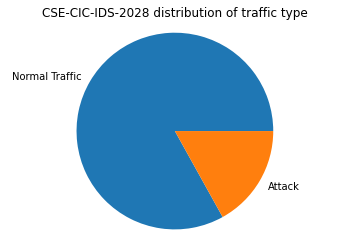

In [7]:
attack_vs_normal.plot(kind='pie')
plt.title('CSE-CIC-IDS-2028 distribution of traffic type')
plt.axis('equal')
plt.ylabel('')
plt.savefig('Data Cleaning/traffic_init_distr_pie.png')

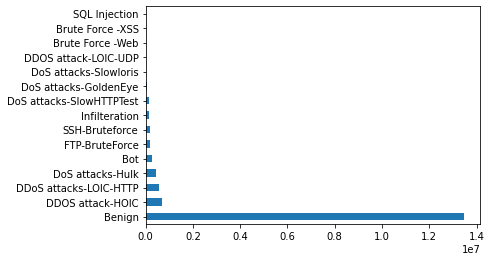

In [8]:
df['Label'].value_counts().plot(kind='barh')
plt.savefig('Data Cleaning/traffic_init_distr_bar.png')

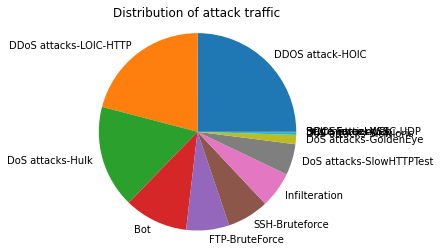

In [9]:
attacks['Label'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of attack traffic')
plt.savefig('Data Cleaning/atack_init_distr_pie.png')

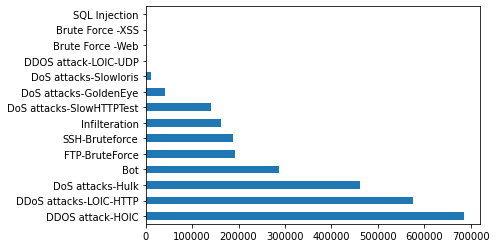

In [10]:
attacks['Label'].value_counts().plot(kind='barh')
plt.savefig('Data Cleaning/attack_init_distr_bar.png')

### Métodos estadísticos

#### Análisis univariante

El análisis univariante examina el patrón de cada característica individual de los datos y puede ser útil cuando comprobamos los valores atípicos y la homogeneidad de la varianza. Lo más importante es que el análisis univariante puede realizarse con poco esfuerzo, pero puede proporcionar una idea general de la distribución de los datos.

En el caso de las variables continuas, el análisis univariante consiste en estadísticas comunes de la distribución, como la media, la varianza, el mínimo, el máximo, la mediana, la moda, etc. En el caso de las variables categóricas, solemos utilizar tablas de frecuencia, gráficos circulares y diagramas de barras para comprender los patrones de cada categoría.

#### Atributos numéricos

Los atributos numéricos del siguiente conjunto de datos pueden resumirse en una colección de estadísticas sobre cada flujo de red independiente. Estas estadísticas han sido preseleccionadas por expertos en ciberseguridad e ingenieros de datos del *Communications Security Establishment* (CSE) y del *Canadian Institute for Cybersecurity* (CIC), para que el conjunto de datos sea lo más genérico posible y pueda proporcionarnos toda la información que necesitamos sobre los ataques originales.

Es de esperar que con un número tan grande de estadísticas y parámetros, encontremos muchas características redundantes o altamente correlacionadas en este conjunto de datos.

In [11]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.617322e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,16232943.0,1.623294e+07,16232943.0,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,16232943.0,16232943.0,16232943.0,16232943.0,16232943.0,16232943.0,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07,1.623294e+07
mean,9.164073e+03,8.754113e+00,1.181380e+07,2.353319e+01,6.312706e+00,9.730373e+02,4.730931e+03,2.007620e+02,1.107600e+01,5.031274e+01,7.084147e+01,3.501495e+02,2.647805e+01,1.130759e+02,1.315657e+02,inf,inf,3.335397e+06,1.275574e+06,6.602697e+06,2.321854e+06,1.152313e+07,3.661300e+06,1.402965e+06,6.409625e+06,2.409649e+06,7.597374e+06,8.241998e+05,8.511741e+05,2.612947e+06,2.912304e+05,4.389543e-02,0.0,1.638027e-04,0.0,2.575408e+02,1.330935e+02,3.667251e+04,1.531596e+04,1.094256e+01,3.893461e+02,7.762634e+01,1.214681e+02,4.117054e+04,4.795434e-03,4.389543e-02,1.873980e-01,3.920842e-01,3.316020e-01,4.171302e-02,1.638027e-04,1.873986e-01,4.964363e-01,8.954040e+01,5.031274e+01,1.130759e+02,0.0,0.0,0.0,0.0,0.0,0.0,2.353319e+01,9.730373e+02,6.312706e+00,4.730909e+03,8.787202e+03,8.689131e+03,1.989528e+01,1.799267e+01,1.728776e+05,8.644097e+04,2.623920e+05,1.154657e+05,5.016958e+06,2.866491e+05,5.428144e+06,4.685631e+06
std,1.892224e+04,4.920117e+00,4.940124e+08,1.521137e+03,1.640256e+02,6.216906e+04,2.344659e+05,3.035091e+02,2.422938e+01,6.050561e+01,1.164407e+02,4.974234e+02,5.097873e+01,1.641056e+02,2.042592e+02,NaN,NaN,2.229483e+08,3.381128e+08,6.595104e+08,7.476211e+08,4.940071e+08,2.229602e+08,3.381193e+08,6.595084e+08,7.476241e+08,2.586288e+07,4.340497e+06,3.376930e+06,1.024426e+07,3.825444e+06,2.048624e-01,0.0,1.279750e-02,0.0,1.226352e+04,3.265496e+03,2.133241e+05,9.241990e+04,2.261941e+01,5.141581e+02,1.037008e+02,1.625302e+02,2.129773e+05,6.908283e-02,2.048624e-01,3.902307e-01,4.882153e-01,4.707888e-01,1.999326e-01,1.279750e-02,3.902312e-01,9.967273e-01,1.082233e+02,6.050561e+01,1.641056e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.521137e+03,6.216906e+04,1.640256e+02,2.344556e+05,1.623560e+04,2.061931e+04,1.519917e+03,7.693845e+00,2.505927e+06,1.514575e+06,3.319230e+06,2.114145e+06,2.633178e+08,1.691887e+08,6.253704e+08,6.365202e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+0

Text(0.5, 1.0, 'Distribution of Dst Port values')

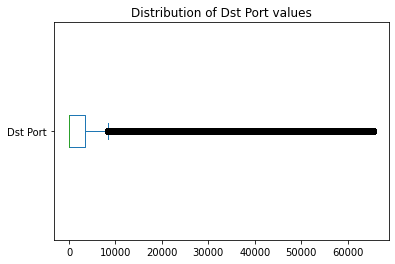

In [12]:
df['Dst Port'].plot(kind='box', vert=False)
plt.title('Distribution of Dst Port values')
#plt.savefig('Data Cleaning/dst_port_distr_bar.png')

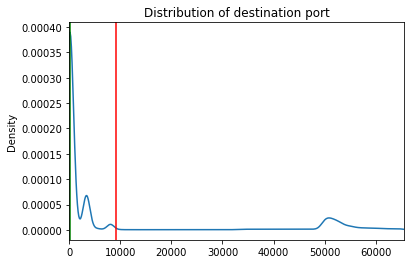

In [13]:
ax = df['Dst Port'].plot(kind='density')
plt.xlim(0, 65535)
ax.axvline(df['Dst Port'].mean(), color='red')
ax.axvline(df['Dst Port'].median(), color='green')
plt.title('Distribution of destination port')
plt.savefig('Data Cleaning/dst_port_all.png')

Text(0.5, 1.0, 'Distribution of destination port')

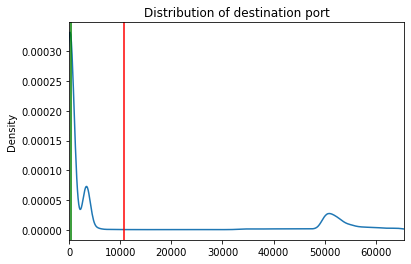

In [14]:
normal_traffic = df[df['Label'] == 'Benign']
ax = normal_traffic['Dst Port'].plot(kind='density')
plt.xlim(0, 65535)
ax.axvline(normal_traffic['Dst Port'].mean(), color='red')
ax.axvline(normal_traffic['Dst Port'].median(), color='green')
plt.title('Distribution of destination port')

Text(0.5, 1.0, 'Distribution of destination port')

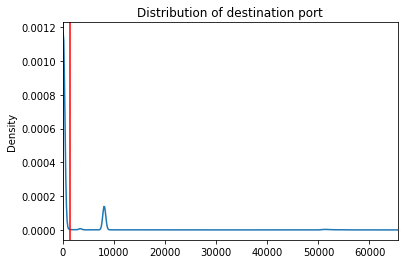

In [15]:
ax = attacks['Dst Port'].plot(kind='density')
plt.xlim(0, 65535)
ax.axvline(attacks['Dst Port'].mean(), color='red')
ax.axvline(attacks['Dst Port'].median(), color='green')
plt.title('Distribution of destination port')

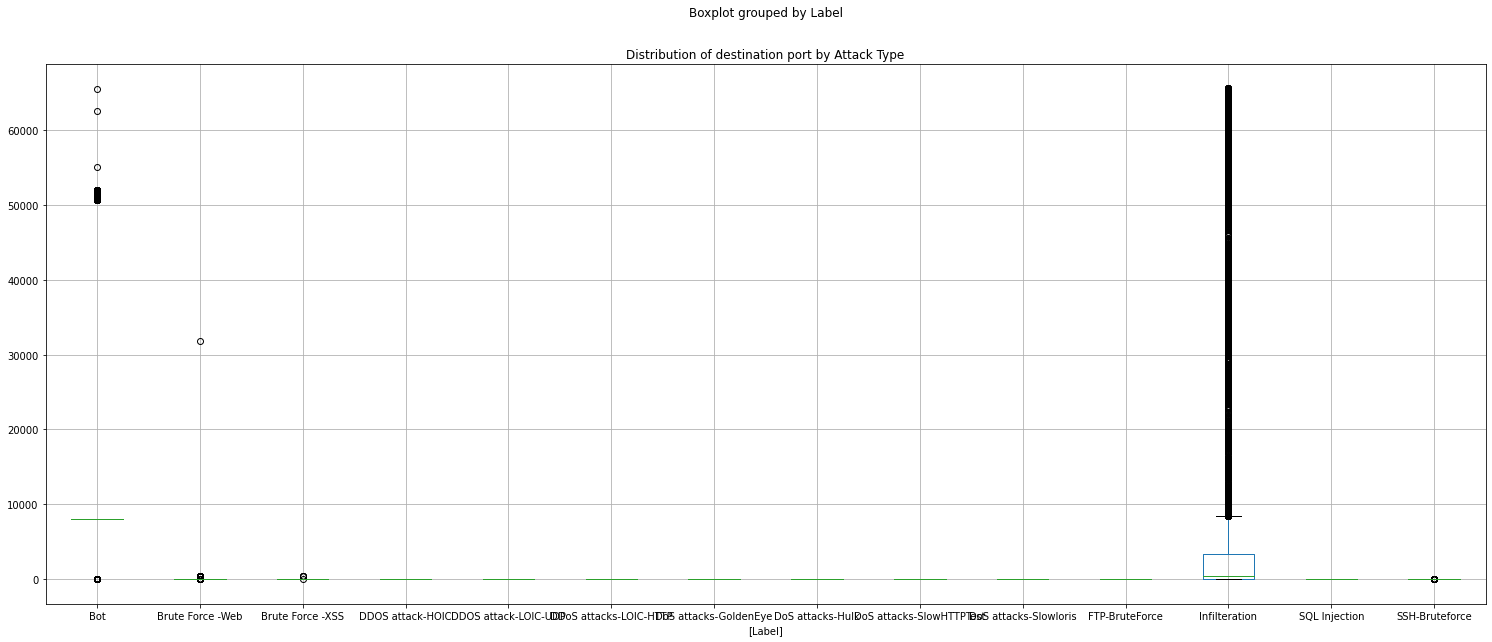

In [16]:
attacks[['Dst Port', 'Label']].boxplot(by='Label', figsize=(25,10))
plt.title('Distribution of destination port by Attack Type')
plt.savefig('Data Cleaning/fwd&bwd_all.png')

In [17]:
pd.set_option('display.max_rows', None)
attacks[['Dst Port', 'Label']].value_counts()

Dst Port  Label                   
80        DDOS attack-HOIC            686012
          DDoS attacks-LOIC-HTTP      576191
          DoS attacks-Hulk            461912
8080      Bot                         281634
21        FTP-BruteForce              193360
22        SSH-Bruteforce              187559
21        DoS attacks-SlowHTTPTest    139890
53        Infilteration                50320
80        DoS attacks-GoldenEye        41508
443       Infilteration                29262
3389      Infilteration                13630
80        DoS attacks-Slowloris        10990
          Infilteration                 5827
445       Infilteration                 5465
135       Infilteration                 2579
0         Infilteration                 2255
80        DDOS attack-LOIC-UDP          1730
22        Infilteration                  939
139       Infilteration                  901
80        Brute Force -Web               460
137       Infilteration                  267
0         Bot       

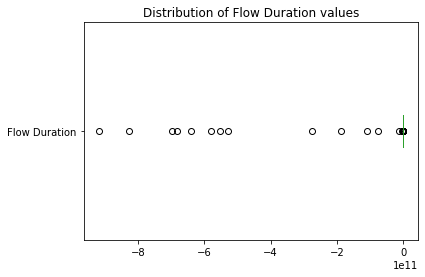

In [18]:
df['Flow Duration'].plot(kind='box', vert=False)
plt.title('Distribution of Flow Duration values')
plt.savefig('Data Cleaning/flow_dur_all.png')

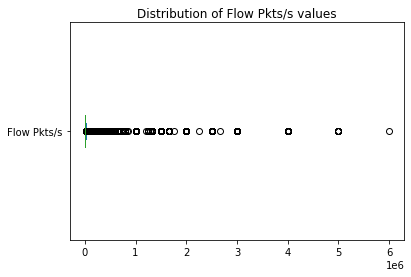

In [19]:
df['Flow Pkts/s'].plot(kind='box', vert=False)
plt.title('Distribution of Flow Pkts/s values')
plt.savefig('Data Cleaning/flow_pkts_s_all.png')

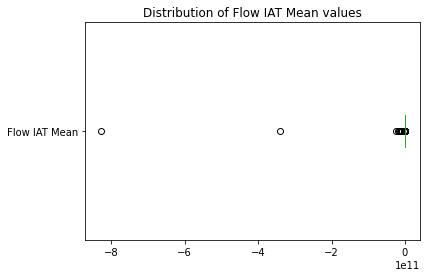

In [20]:
df['Flow IAT Mean'].plot(kind='box', vert=False)
plt.title('Distribution of Flow IAT Mean values')
plt.savefig('Data Cleaning/flow_IAT_mean_all.png')

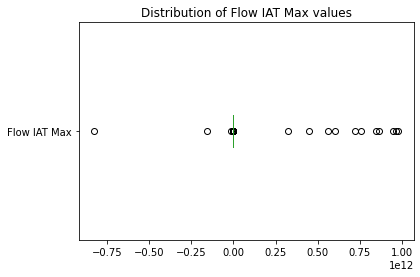

In [21]:
df['Flow IAT Max'].plot(kind='box', vert=False)
plt.title('Distribution of Flow IAT Max values')
plt.savefig('Data Cleaning/flow_IAT_max_all.png')

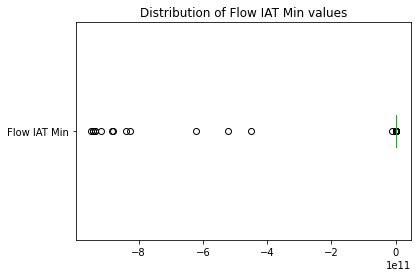

In [22]:
df['Flow IAT Min'].plot(kind='box', vert=False)
plt.title('Distribution of Flow IAT Min values')
plt.savefig('Data Cleaning/flow_IAT_min_all.png')

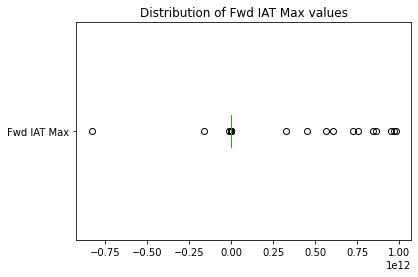

In [23]:
df['Fwd IAT Max'].plot(kind='box', vert=False)
plt.title('Distribution of Fwd IAT Max values')
plt.savefig('Data Cleaning/fwd_IAT_max_all.png')

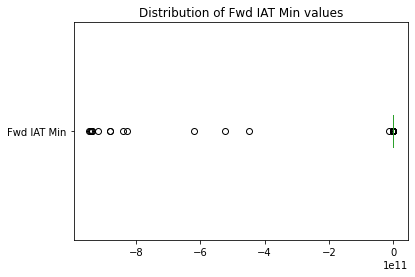

In [24]:
df['Fwd IAT Min'].plot(kind='box', vert=False)
plt.title('Distribution of Fwd IAT Min values')
plt.savefig('Data Cleaning/fwd_IAT_min_all.png')

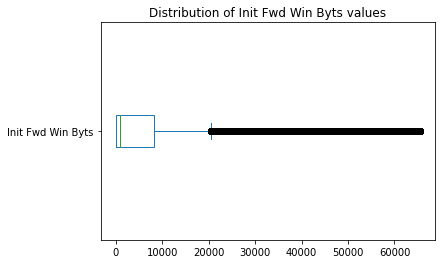

In [25]:
df['Init Fwd Win Byts'].plot(kind='box', vert=False)
plt.title('Distribution of Init Fwd Win Byts values')
plt.savefig('Data Cleaning/init_fwd_win_byts_all.png')

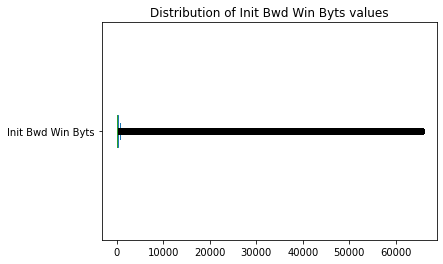

In [26]:
df['Init Bwd Win Byts'].plot(kind='box', vert=False)
plt.title('Distribution of Init Bwd Win Byts values')
plt.savefig('Data Cleaning/init_bwd_win_byts_all.png')

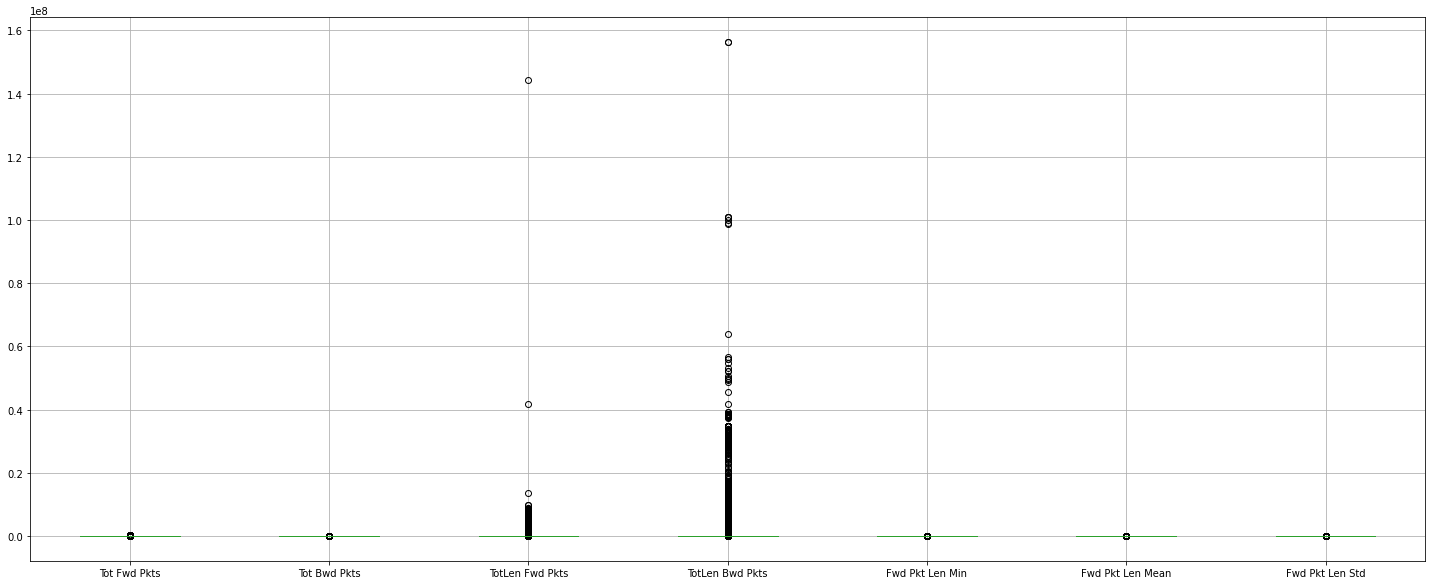

In [27]:
df[['Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std']].boxplot(figsize=(25,10))
plt.savefig('Data Cleaning/comon_stats_distr_all.png')

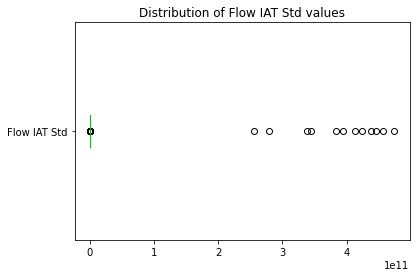

In [28]:
df['Flow IAT Std'].plot(kind='box', vert=False)
plt.title('Distribution of Flow IAT Std values')
plt.savefig('Data Cleaning/flow_IAT_std_all.png')

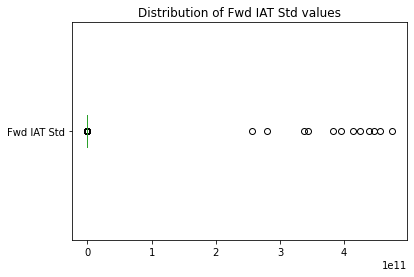

In [29]:
df['Fwd IAT Std'].plot(kind='box', vert=False)
plt.title('Distribution of Fwd IAT Std values')
plt.savefig('Data Cleaning/fwd_IAT_std_all.png')

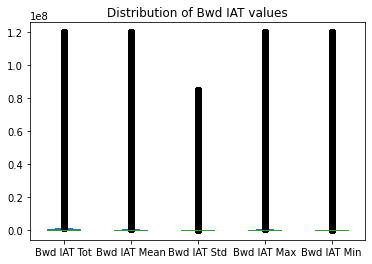

In [30]:
df[['Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min']].plot(kind='box')
plt.title('Distribution of Bwd IAT values')
plt.savefig('Data Cleaning/bwd_IAT_all.png')

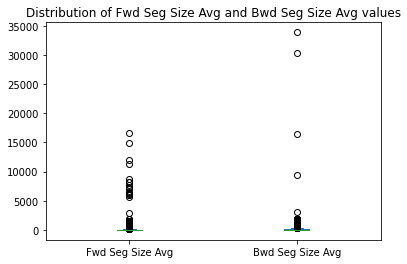

In [31]:
df[['Fwd Seg Size Avg', 'Bwd Seg Size Avg']].plot(kind='box')
plt.title('Distribution of Fwd Seg Size Avg and Bwd Seg Size Avg values')
plt.savefig('Data Cleaning/fwd&bwd_seg_size_all.png')

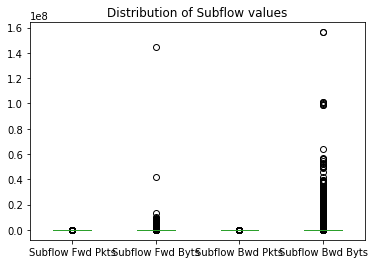

In [32]:
df[['Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts']].plot(kind='box')
plt.title('Distribution of Subflow values')
plt.savefig('Data Cleaning/subflow_all.png')

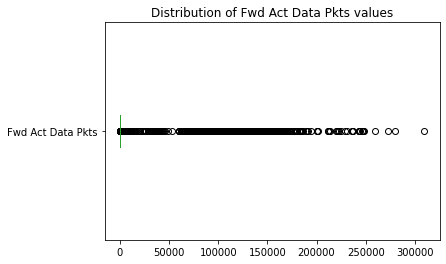

In [33]:
df['Fwd Act Data Pkts'].plot(kind='box', vert=False)
plt.title('Distribution of Fwd Act Data Pkts values')
plt.savefig('Data Cleaning/fwd_act_data_pkts_all.png')

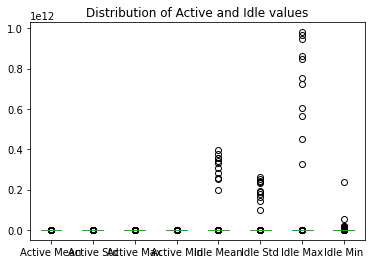

In [34]:
df[['Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']].plot(kind='box')
plt.title('Distribution of Active and Idle values')
plt.savefig('Data Cleaning/active&idle_all.png')

### Valores categóricos

Este conjunto de datos muestra la enorme cantidad de atributos numéricos frente a los categóricos. Estos últimos son sólo la propia etiqueta y la marca de tiempo. Aunque viéndolo de otra manera, podemos ver que hay ciertos atributos numéricos que podríamos tratar como categóricos para su visualización, como el puerto de destino o el protocolo. 

El análisis de la distribución de los valores de las etiquetas (normal, DDoS, fuerza bruta, infiltración, etc.) se encuentra en el apartado anterior, donde se habla de la distribución del tráfico.

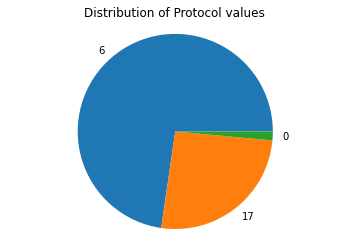

In [35]:
df['Protocol'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of Protocol values')
plt.savefig('Data Cleaning/protocol_distr_all.png')